#Reference:
Everything about OpenCV 

https://github.com/methylDragon/opencv-python-reference/blob/master/01%20OpenCV%20Basics%20and%20Image%20Processing.md

Importing Required Libraries

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [ ]:
## Reading and looking how the images look!
img = cv2.imread("drive/My Drive/Abhiyaan_Application/Image Bounding Box/abhiyaan_opencv_qn1.png")
obstacle = cv2.imread("drive/My Drive/Abhiyaan_Application/Image Bounding Box/obstacle.png")

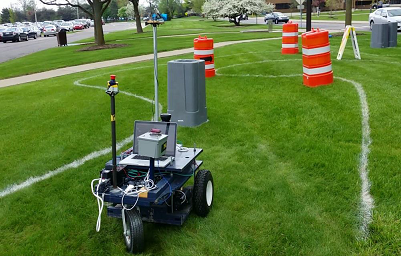

In [ ]:
cv2_imshow(img)

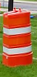

In [ ]:
cv2_imshow(obstacle)

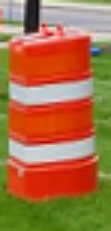

In [ ]:
obs_resize = cv2.resize(obstacle, (111,231))
cv2_imshow(obs_resize)

#**Histogram Backprojection**

In [ ]:
# Using HSV color space for target
hsv_orig = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Using HSV color space for ROI
hsv_obs  = cv2.cvtColor(obs_resize, cv2.COLOR_BGR2HSV)

In [ ]:
# calculating object histogram
obs_hist = cv2.calcHist([hsv_obs], [0, 1], None, [180, 256], [0, 180, 0, 256])

### Applying Backprojection

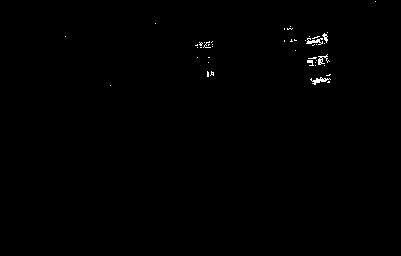

In [ ]:
mask = cv2.calcBackProject([hsv_orig], [0,1], obs_hist, [0, 180, 0, 256], 1)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
_, mask = cv2.threshold(mask,100, 255, cv2.THRESH_BINARY)
cv2.filter2D(mask, -1, kernel)
cv2_imshow(mask)

In [ ]:
mask = cv2.merge((mask, mask, mask))
result_masked = cv2.bitwise_and(img, mask)

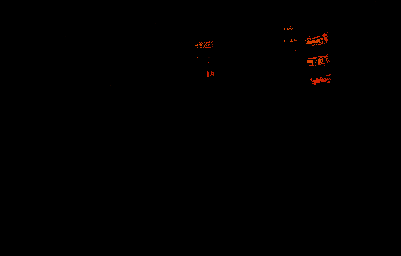

In [ ]:
cv2_imshow(result_masked)

In [ ]:
#Defining a function to check if the contours are close enough to be merged
def find_if_close(cnt1,cnt2):
    row1,row2 = cnt1.shape[0],cnt2.shape[0]
    for i in range(row1):
        for j in range(row2):
            dist = np.linalg.norm(cnt1[i]-cnt2[j])
            if abs(dist) < 15 :
                return True
            elif i==row1-1 and j==row2-1:
                return False

###In the below cell we are drawing contours based on the masked image. We the merge close enough contours to make the final boundaries.

In [ ]:
img_contour = img.copy()

gray = cv2.cvtColor(result_masked,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,75,255,cv2.THRESH_BINARY)
contours,hier = cv2.findContours(thresh,cv2.RETR_EXTERNAL,2)

LENGTH = len(contours)
status = np.zeros((LENGTH,1))

for i,cnt1 in enumerate(contours):
    x = i    
    if i != LENGTH-1:
        for j,cnt2 in enumerate(contours[i+1:]):
            x = x+1
            dist = find_if_close(cnt1,cnt2)
            if dist == True:
                val = min(status[i],status[x])
                status[x] = status[i] = val
            else:
                if status[x]==status[i]:
                    status[x] = i+1

unified = []
maximum = int(status.max())+1
for i in range(maximum):
    pos = np.where(status==i)[0]
    if pos.size != 0:
        cont = np.vstack(contours[i] for i in pos)
        hull = cv2.convexHull(cont)
        unified.append(hull)

cv2.drawContours(img_contour,unified,-1,(0,255,0),2)
cv2.drawContours(thresh,unified,-1,255,-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

##This is how the final boundaries look like!

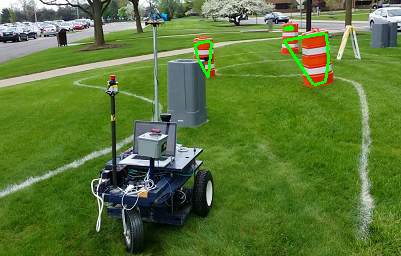

In [ ]:
cv2_imshow(img_contour)

#**Template Matching**

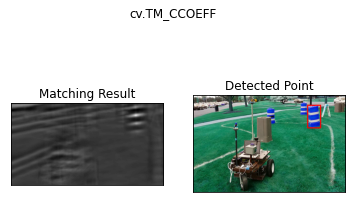

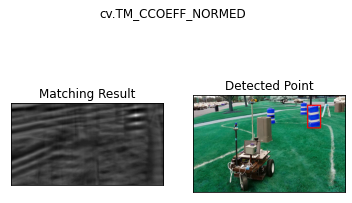

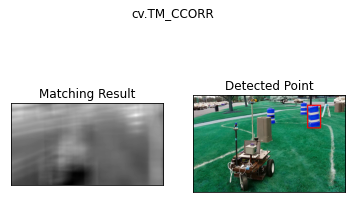

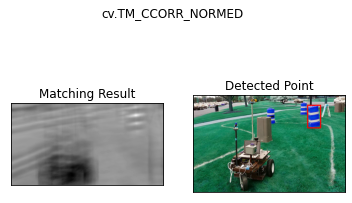

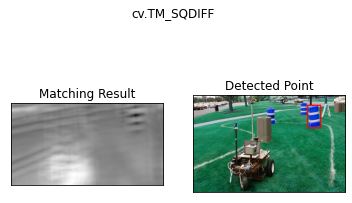

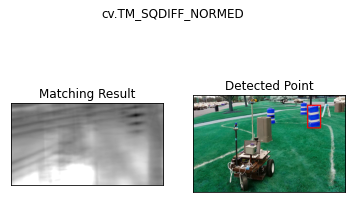

In [ ]:
import matplotlib.pyplot as plt

template = cv.imread(path_roi)
img = cv.imread(path_target)
img2 = img.copy()

w = template.shape[1]
h = template.shape[0]

## Code if only once the object appears

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()


###Matching the Template

(59, 34, 3)
(array([29, 29, 29]), array([299, 300, 301]))


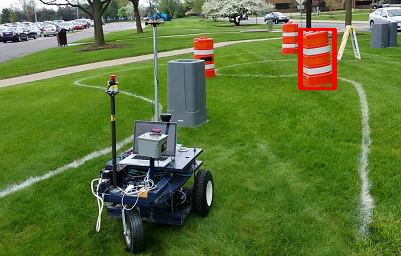

In [ ]:
import numpy as np 
img_rgb = cv.imread(path_target)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
img_gray=img_gray.astype(np.float32)
template = cv.imread(path_roi)

print(template.shape)
w = template.shape[1]
h = template.shape[0]
template = np.resize(template, (h,w,3))
res = cv.matchTemplate(img_rgb,template,cv.TM_CCOEFF_NORMED)
threshold = 0.9
loc = np.where( res >= threshold)
print(loc)
for pt in zip(*loc[::-1]):
    # print(pt)
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv2_imshow(img_rgb)

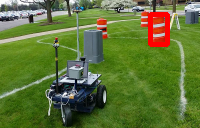

In [ ]:
import numpy as np
import cv2
 
image = cv2.imread(path_target)
template = cv2.imread(path_roi)
 
# resize images
image = cv2.resize(image, (0,0), fx=0.5, fy=0.5) 
template = cv2.resize(template, (0,0), fx=0.5, fy=0.5) 
 
# Convert to grayscale
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
templateGray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
 
# Find template
result = cv2.matchTemplate(imageGray,templateGray, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
h,w = templateGray.shape
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(image,top_left, bottom_right,(0,0,255),4)
 
# Show result
cv2_imshow(template)
cv2_imshow(image)
 